# Example data analysis notebook

This notebook downloads and analyses some surface air temperature anomaly data from [Berkeley Earth](http://berkeleyearth.org/).

Import the required libraries.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import requests  # downloads things via http
import os
from data_analysis import download_data, moving_average

Use the [requests](http://docs.python-requests.org/) library to download the data file for Australia.

Create new function to generate the data download url

In [3]:
location = 'canada'
data = download_data(location)

Extract the monthly temperature anomaly and calculate an approximate "decimal year" to use in plotting.

In [4]:
decimal_year = data[:, 0] + 1/12*(data[:, 1] - 1)
temperature_anomaly = data[:, 2]

Plot the data so we can see what it's like.

(1768.6666666666667, 2013.6666666666667)

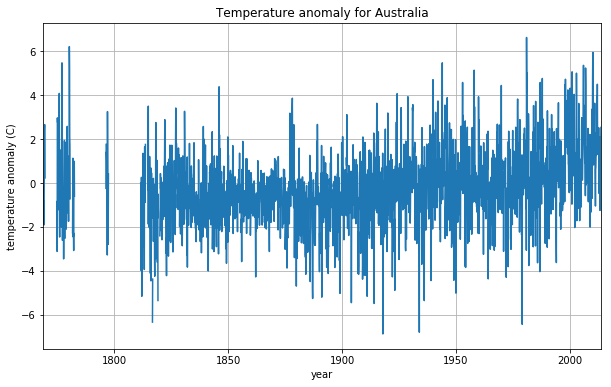

In [5]:
plt.figure(figsize=(10, 6))
plt.title("Temperature anomaly for Australia")
plt.plot(decimal_year, temperature_anomaly)
plt.xlabel('year')
plt.ylabel('temperature anomaly (C)')
plt.grid()
plt.xlim(decimal_year.min(), decimal_year.max())

The data are kind of noisy at this scale so let's calculate a 12-month moving average for a smoother time series.

In [6]:
window_size = 30
moving_avg = moving_average(temperature_anomaly, window_size)

(1768.6666666666667, 2013.6666666666667)

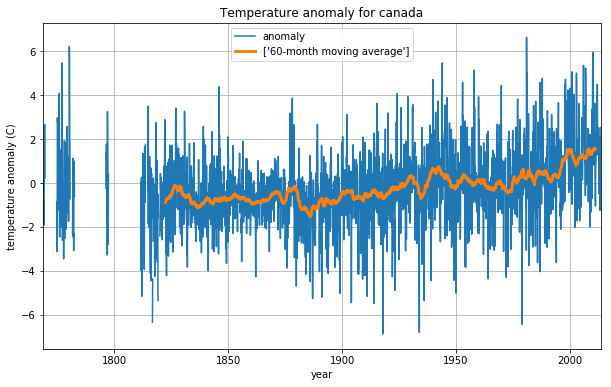

In [7]:
plt.figure(figsize=(10, 6))
plt.title(f'Temperature anomaly for {location}')
plt.plot(decimal_year, temperature_anomaly, label="anomaly")
plt.plot(decimal_year, moving_avg, label=[str(2*window_size)+"-month moving average"], linewidth=3)
plt.xlabel('year')
plt.ylabel('temperature anomaly (C)')
plt.legend()
plt.grid()
plt.xlim(decimal_year.min(), decimal_year.max())